<br>

# Técnicas Matemáticas para Big Data - Project NN?
<br><br>


GROUP NN:
- Student 1 - Nº xxxxx - ??% Work Participation
- Student 2 - Nº xxxxx - ??% Work Participation
- Student 3 - Nº xxxxx - ??% Work Participation

<br><br>

## 1. Introduction to the problem of study [1,0 valor]

                    🍇 Harvest (Grape Picking)
                                │
                                ▼
                   Destemming & Crushing of Grapes
                                │
                                ▼
              Maceration + Alcoholic Fermentation
      (skin contact for colour, tannins & phenolic extraction)
                                │
             Yeasts convert sugars → Ethanol (Alcohol) + CO₂
                                │
                                ▼
              Punch-downs / Pump-overs & Temperature Control
                  (enhances colour and flavour extraction)
                                │
                                ▼
                        Racking (Decantation)
                (separation of wine from solid deposits)
                                │
                                ▼
                Malolactic Fermentation (optional)
           (malic acid → lactic acid → smoother mouthfeel)
                                │
                                ▼
            Clarification / Stabilization / Filtration
   (removal of solids, microbial stabilization, SO₂ management)
   
                                │
                                ▼
                     Aging / Maturation Stage
       (in stainless steel tanks or oak barrels – flavour development)

                                │
                                ▼
                           Bottling 🍷
                                │
                                ▼
                   Storage, Marketing & Distribution


The red wine production process consists of a sequence of stages that shape the chemical composition of the final product. Variables present in the dataset, such as alcohol, residual sugar and density, are directly influenced by the alcoholic fermentation stage, while volatile acidity is associated with microbial activity and potential spoilage. Compounds like sulphates and total/free sulfur dioxide reflect stabilization and preservation treatments applied before bottling. Therefore, understanding the winemaking process is essential for interpreting PCA patterns, relating chemical parameters to quality outcomes, and supporting later predictive modelling.

<br><br>
## 2. Brief and general description of the approach and methods used [1,5 valor]

<br><br>
## 3. Brief History and literature review of the problem and methods/algorithms [1,5 valor]

<br><br>
## 4. About the main method/algorithm used [1,5 valor]

<br><br>

## 5. Python imports and global configurations [0,5 valor]

### Install and import the necessary libraries to compute the Bayesian Network and perform other methods  

In [46]:
# %pip install pandas
# %pip install seaborn
# %pip install matplotlib
# %pip install numpy
# %pip install pomegranate
# %pip install torch
# %pip install Pillow


import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from ucimlrepo import fetch_ucirepo
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import pingouin as pg
from itertools import combinations
from sklearn.manifold import TSNE

<br><br>

## 6. Dataset and variables explanation [1,5 valor]

In [64]:
df = pd.read_csv(r"winequality-red.csv")
print(df.head(10))
print()
print(df.describe())
print(df.dtypes)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   
5            7.4              0.66         0.00             1.8      0.075   
6            7.9              0.60         0.06             1.6      0.069   
7            7.3              0.65         0.00             1.2      0.065   
8            7.8              0.58         0.02             2.0      0.073   
9            7.5              0.50         0.36             6.1      0.071   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

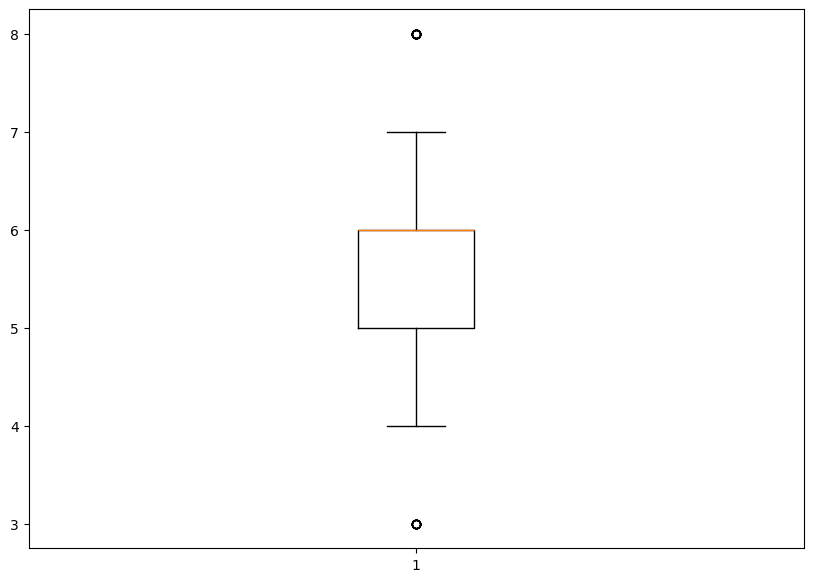

In [38]:
d = df['quality']

fig = plt.figure(figsize =(10, 7))

plt.boxplot(d)
plt.show()


### Normalize

In [80]:
scaler = StandardScaler()

df_balanced = df.groupby('quality').apply(lambda x: x.sample(100, replace=True)).reset_index(drop=True)


features = df.columns.to_list()
features_to_norm = features[:-1]
df_norm = df_balanced[features_to_norm]

df_norm[features_to_norm] = scaler.fit_transform(df_balanced[features_to_norm])
y = df_balanced['quality']

print(df_norm.head(10))
print()
print(df_norm.describe())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.612443          1.084741    -0.940407        2.866496  -0.140723   
1      -0.612443          1.084741    -0.940407        2.866496  -0.140723   
2      -0.332874          3.733199    -1.166884       -0.349852   0.850708   
3      -0.332874          3.733199    -1.166884       -0.349852   0.850708   
4       0.058523          1.629459    -1.076293        0.811607  -0.104671   
5      -0.332874          3.733199    -1.166884       -0.349852   0.850708   
6       1.903680         -0.023479     1.822609       -0.260509  -0.284931   
7      -0.780184          0.859340    -1.166884       -1.153939   3.194092   
8      -0.780184          0.859340    -1.166884       -1.153939   3.194092   
9       1.232714          0.089221     1.052588       -0.349852   1.986348   

   free sulfur dioxide  total sulfur dioxide   density        pH  sulphates  \
0            -1.092508             -0.825162  0.810045  0.3820

/tmp/ipykernel_668198/2601080191.py:3: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  df_balanced = df.groupby('quality').apply(lambda x: x.sample(100, replace=True)).reset_index(drop=True)
/tmp/ipykernel_668198/2601080191.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_norm[features_to_norm] = scaler.fit_transform(df_balanced[features_to_norm])


### Correlation Matrix

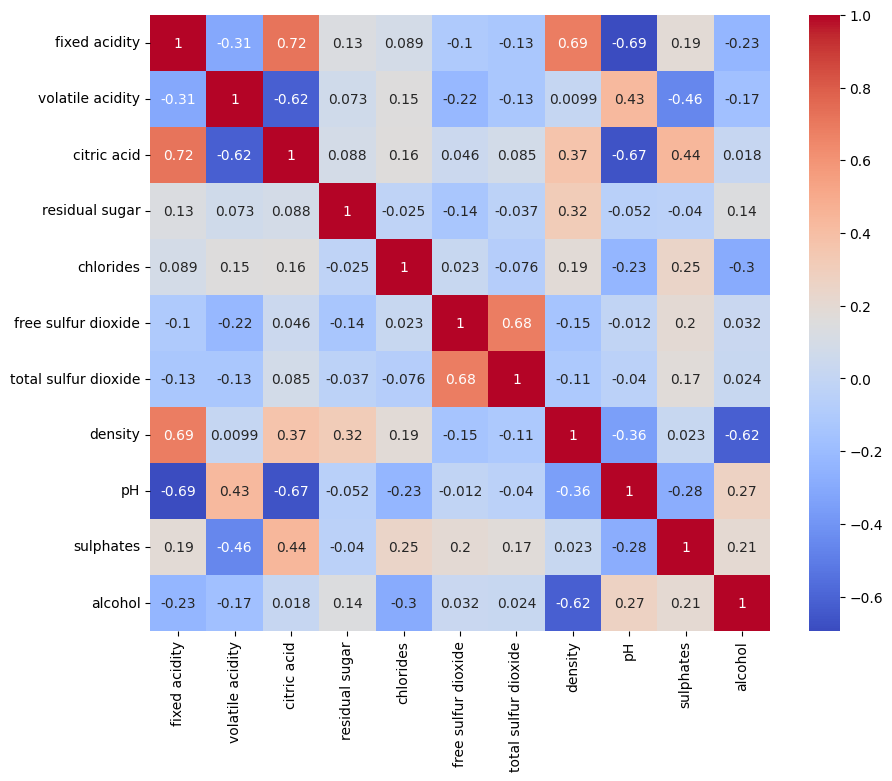

In [81]:
plt.figure(figsize=(10,8))
sns.heatmap(df_norm.corr(), annot=True, cmap='coolwarm')
plt.show()

In [83]:
pca_df = PCA(n_components=11)
principalComponents = pca_df.fit_transform(df_norm)

PC1: 30.13% | Acumulada: 30.13%
PC2: 20.12% | Acumulada: 50.25%
PC3: 13.59% | Acumulada: 63.84%
PC4: 10.48% | Acumulada: 74.32%
PC5: 9.15% | Acumulada: 83.47%
PC6: 4.97% | Acumulada: 88.43%
PC7: 3.88% | Acumulada: 92.32%
PC8: 3.38% | Acumulada: 95.70%
PC9: 2.70% | Acumulada: 98.40%
PC10: 1.08% | Acumulada: 99.48%
PC11: 0.52% | Acumulada: 100.00%


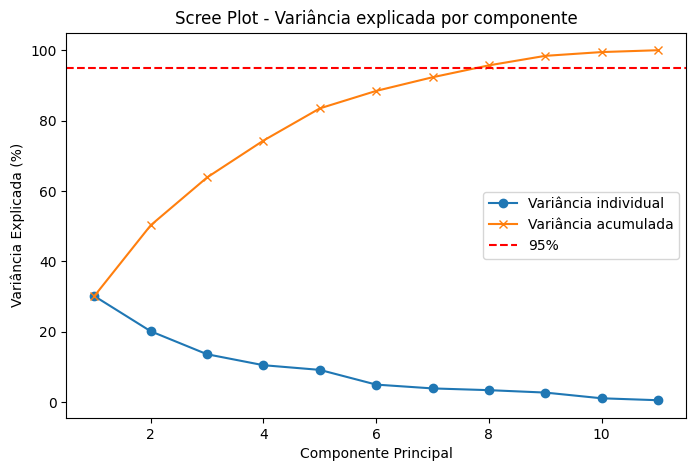

In [84]:

variancia = pca_df.explained_variance_ratio_
variancia_acum = np.cumsum(variancia)

# =============================
# 1. Tabela de variância
# =============================
for i, v in enumerate(variancia):
    print(f"PC{i+1}: {v*100:.2f}% | Acumulada: {variancia_acum[i]*100:.2f}%")

# =============================
# 2. Scree Plot
# =============================
plt.figure(figsize=(8,5))
plt.plot(range(1,len(variancia)+1), variancia*100, marker='o')
plt.plot(range(1,len(variancia)+1), variancia_acum*100, marker='x')
plt.title("Scree Plot - Variância explicada por componente")
plt.xlabel("Componente Principal")
plt.ylabel("Variância Explicada (%)")
plt.axhline(95, color='red', linestyle='--', label="95% Variância")
plt.legend(["Variância individual", "Variância acumulada","95%"])
plt.show()

In [85]:
pca_df = PCA(n_components=6)
principalComponents = pca_df.fit_transform(df_norm)

In [86]:
principal_Df = pd.DataFrame(pca_df.components_.T, index=df_norm.columns
             , columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'])

In [87]:
principal_Df

,PC1,PC2,PC3,PC4,PC5,PC6
fixed acidity,0.476386,-0.147771,0.085819,0.125674,-0.151014,-0.078893
volatile acidity,-0.302101,-0.380006,-0.243133,0.031849,0.248710,-0.179970
citric acid,0.478306,0.146386,0.160044,-0.010913,-0.011428,-0.151098
residual sugar,0.077485,-0.153898,0.223865,0.597758,0.615638,-0.073142
chlorides,0.153280,-0.127103,-0.333136,-0.520840,0.562755,-0.268602
free sulfur dioxide,0.018949,0.452072,-0.466776,0.212767,0.023639,-0.040474
total sulfur dioxide,0.014955,0.425274,-0.446436,0.361431,0.052182,-0.097158
density,0.352899,-0.369971,-0.187021,0.274223,0.033286,0.435771
pH,-0.457246,-0.008229,0.018791,0.069657,0.106337,0.511776
sulphates,0.252109,0.345102,0.076008,-0.310255,0.375068,0.589361


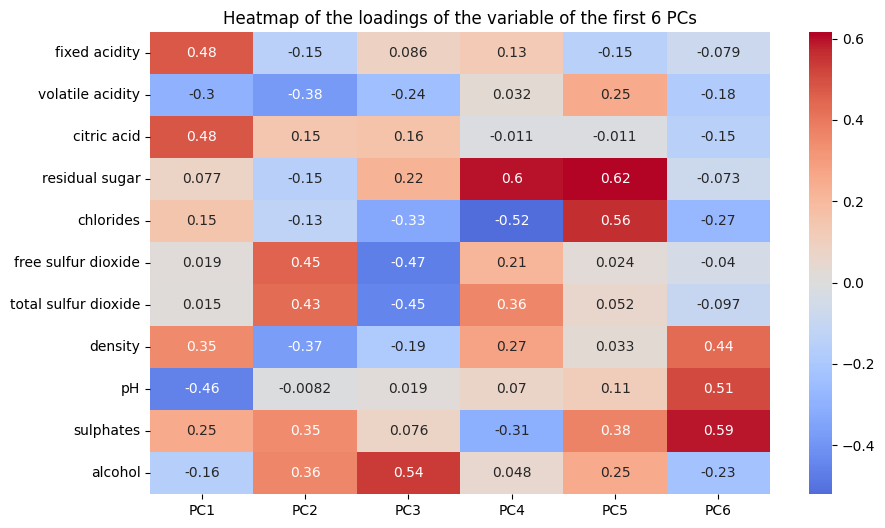

In [88]:
plt.figure(figsize=(10,6))
sns.heatmap(principal_Df, annot=True, cmap="coolwarm", center=0)
plt.title("Heatmap of the loadings of the variable of the first 6 PCs")
plt.yticks(rotation=0)
plt.show()


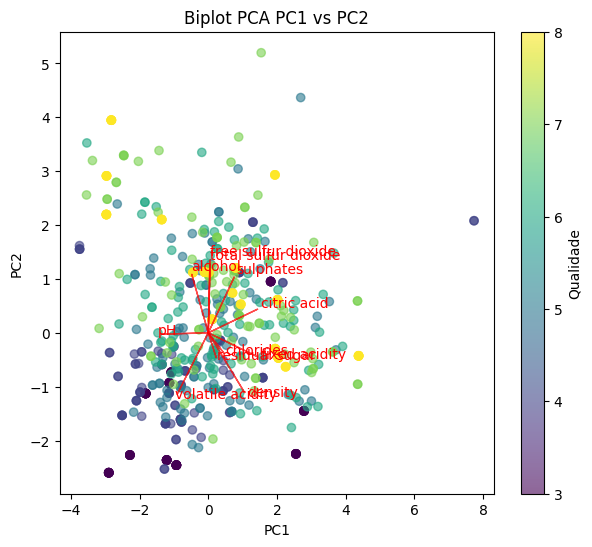

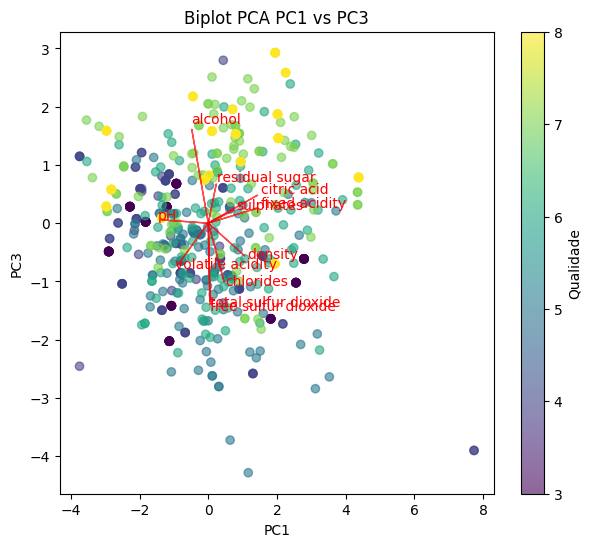

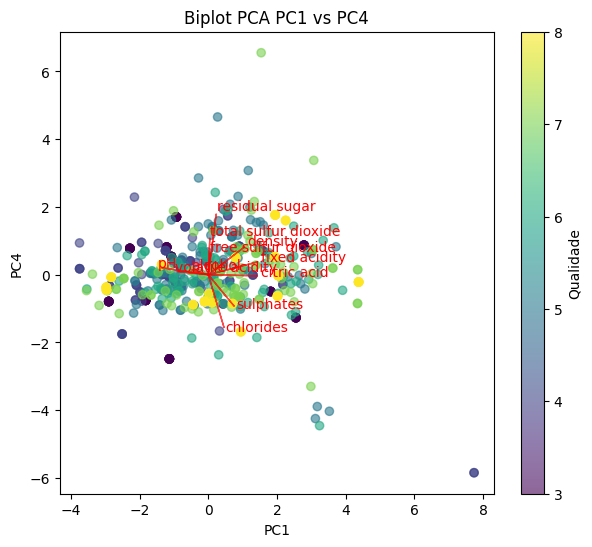

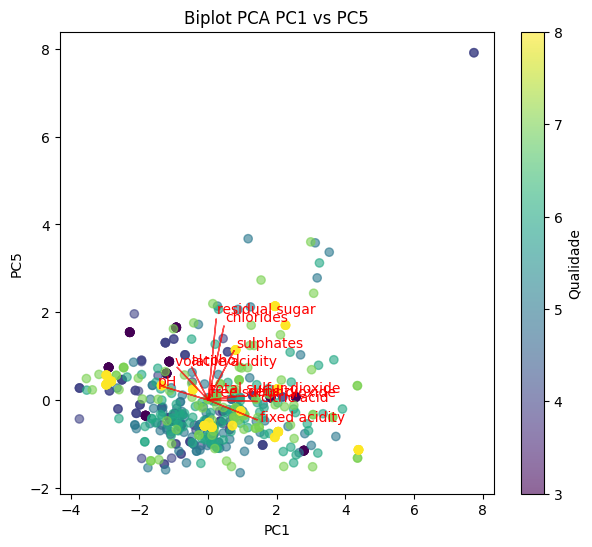

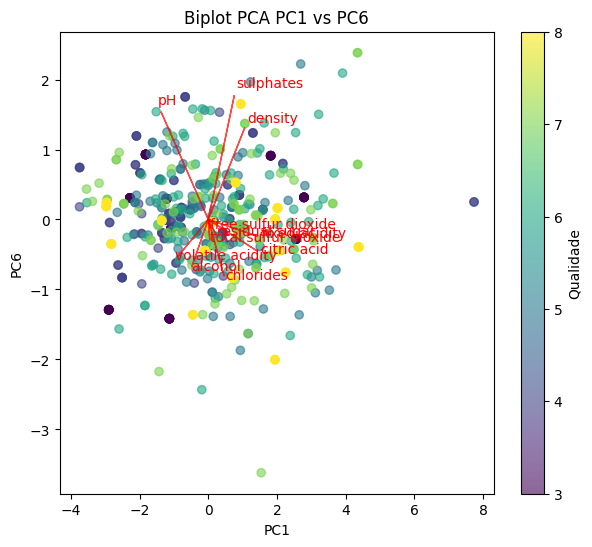

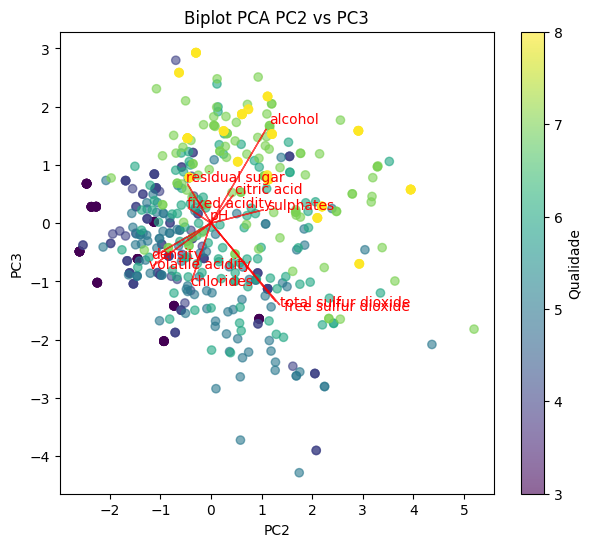

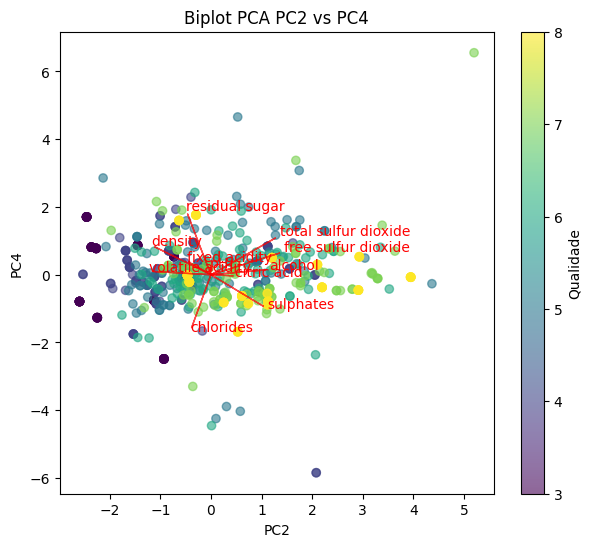

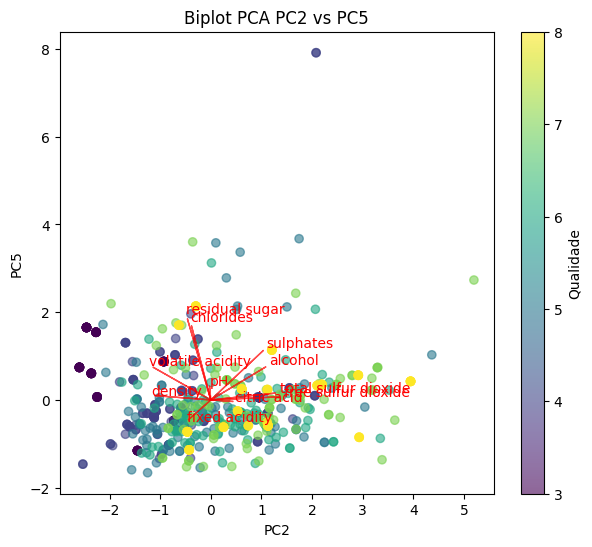

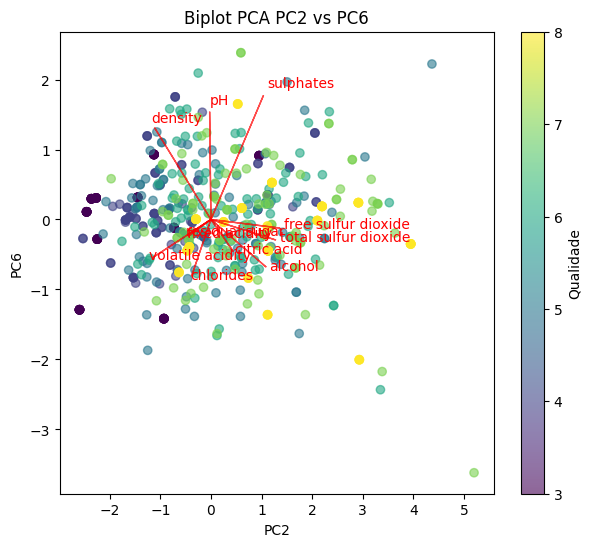

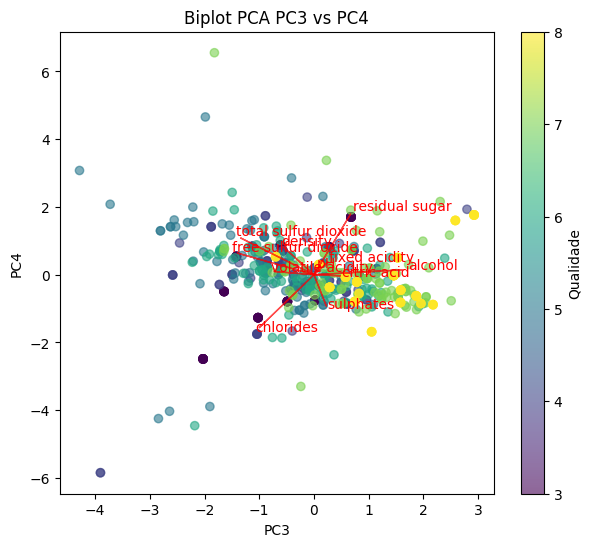

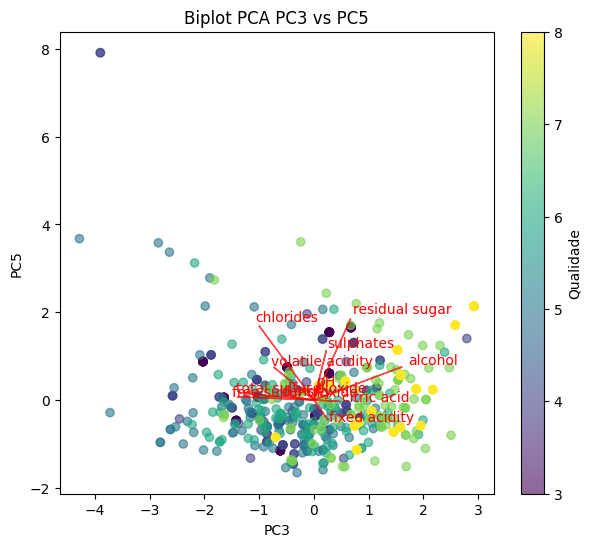

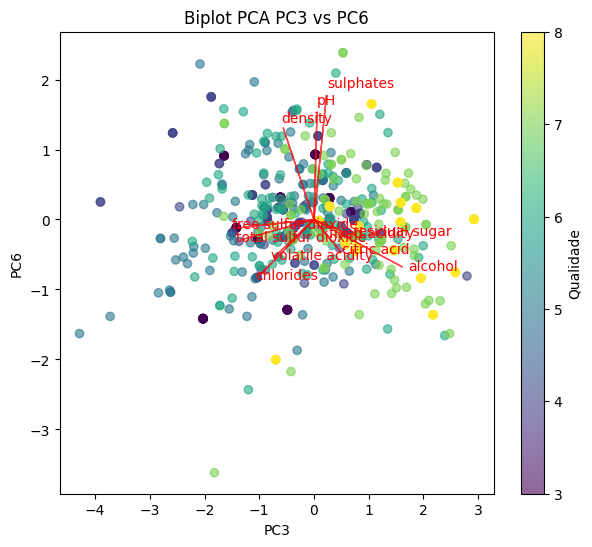

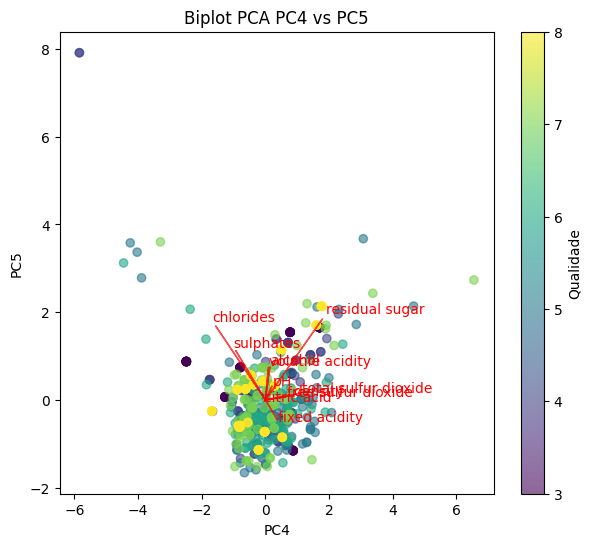

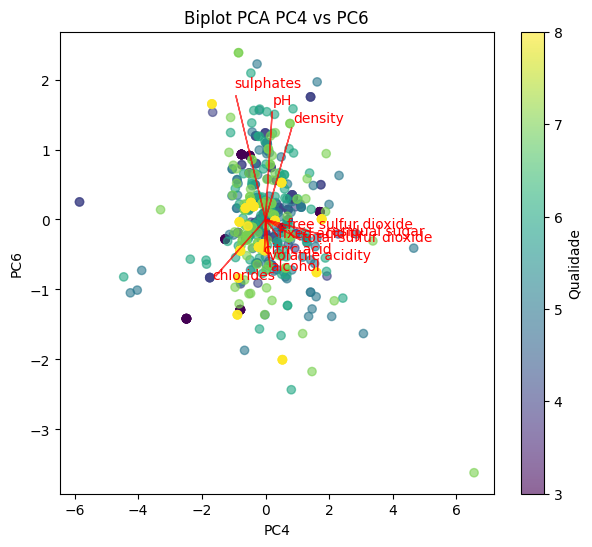

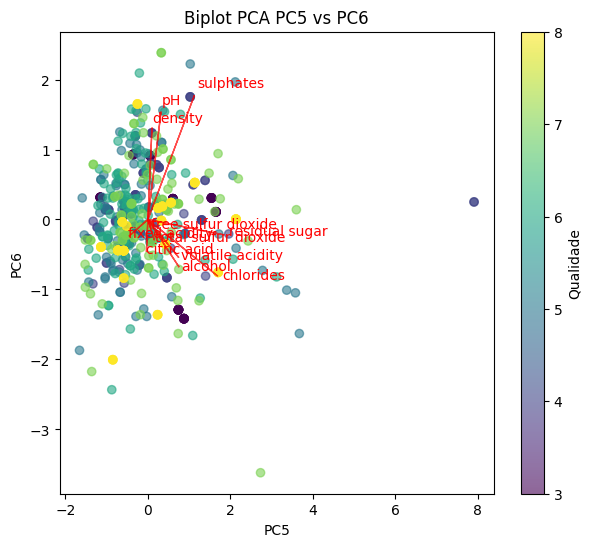

In [91]:

# PCA para 6 componentes
pca = PCA(n_components=6)
X_pca = pca.fit_transform(df_norm)
loadings = pca.components_.T

pairs = list(combinations(range(6), 2))  
#y = df_norm['quality']

for (i,j) in pairs:
    plt.figure(figsize=(7,6))
    plt.scatter(X_pca[:, i], X_pca[:, j], c=y, cmap="viridis", alpha=0.6)
    plt.xlabel(f"PC{i+1}")
    plt.ylabel(f"PC{j+1}")
    plt.title(f"Biplot PCA PC{i+1} vs PC{j+1}")

    # Vetores das variáveis
    for k, var in enumerate(df_norm.columns):
        plt.arrow(0, 0, loadings[k, i]*3, loadings[k, j]*3, color='red', alpha=0.7)
        plt.text(loadings[k, i]*3.2, loadings[k, j]*3.2, var, color='red')

    plt.colorbar(label='Qualidade')
    plt.show()

### t-SNE

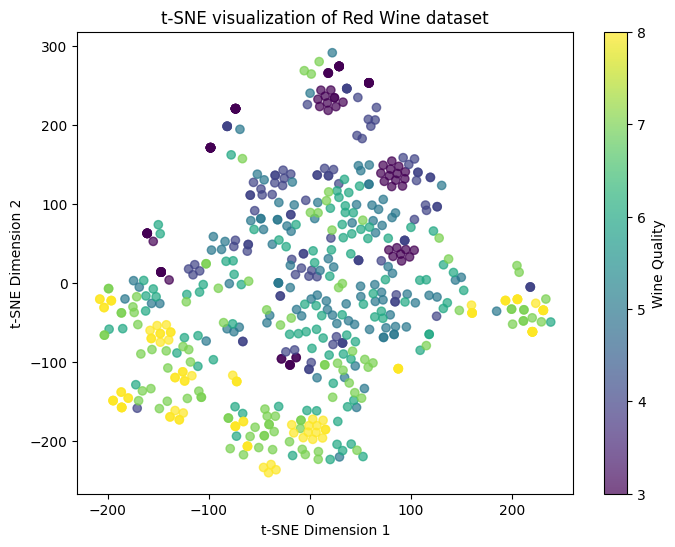

In [92]:
# ---------- t-SNE ----------
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200,
             random_state=42)
X_tsne = tsne.fit_transform(X_pca)

# ---------- Plot t-SNE with quality ----------
plt.figure(figsize=(8,6))
scatter = plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y, cmap="viridis", alpha=0.7)
plt.colorbar(scatter, label="Wine Quality")
plt.title("t-SNE visualization of Red Wine dataset")
plt.xlabel("t-SNE Dimension 1")
plt.ylabel("t-SNE Dimension 2")
plt.show()


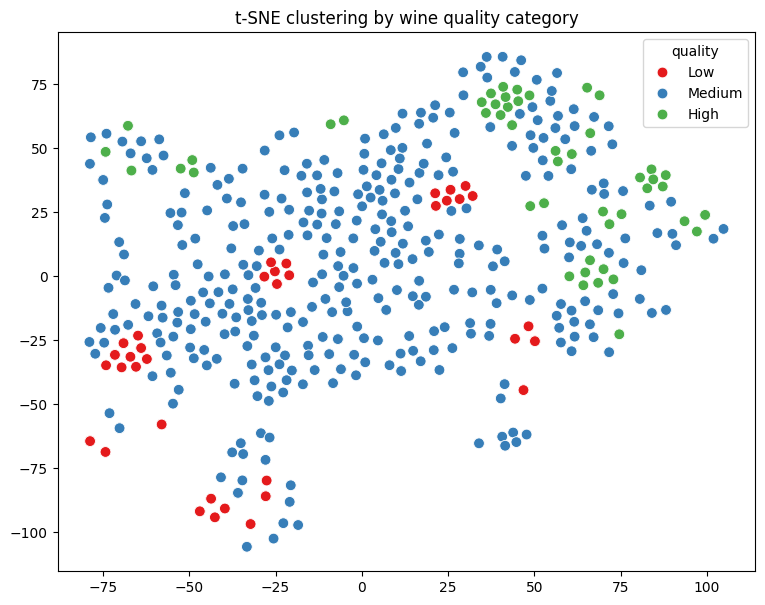

In [97]:
# Quality to categories (optional, nicer visual)
y_cat = y.apply(lambda q: "Low" if q<=3 else "Medium" if q<=7 else "High")

plt.figure(figsize=(9,7))
sns.scatterplot(x=X_tsne[:,0], y=X_tsne[:,1], hue=y_cat, palette="Set1", s=60)
plt.title("t-SNE clustering by wine quality category")
plt.show()


Running TSNE with perplexity=10


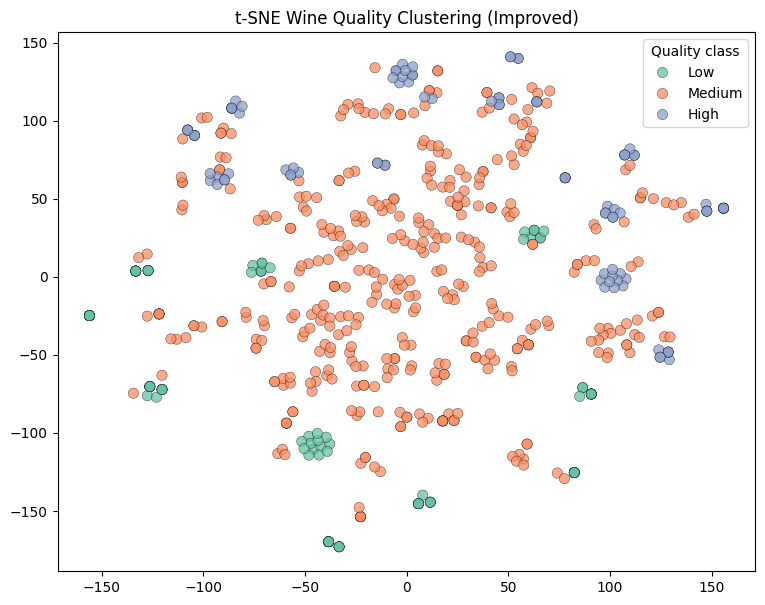

Running TSNE with perplexity=20


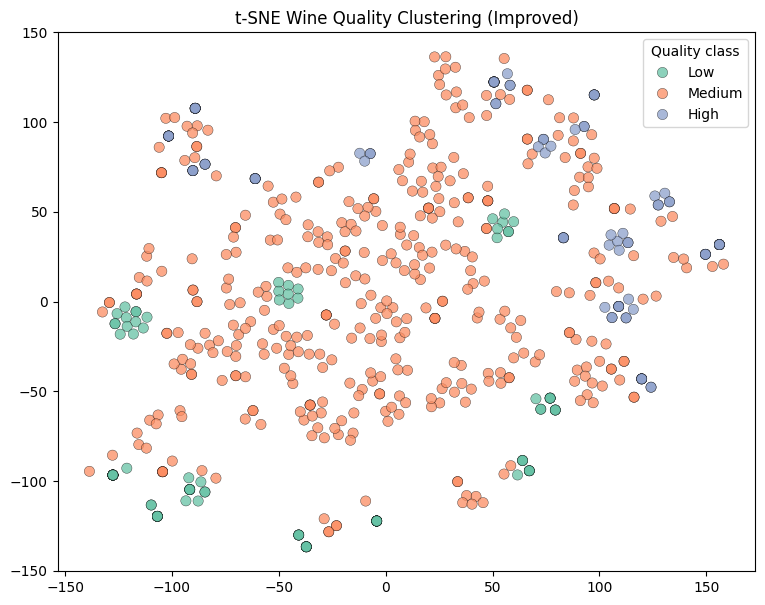

Running TSNE with perplexity=30


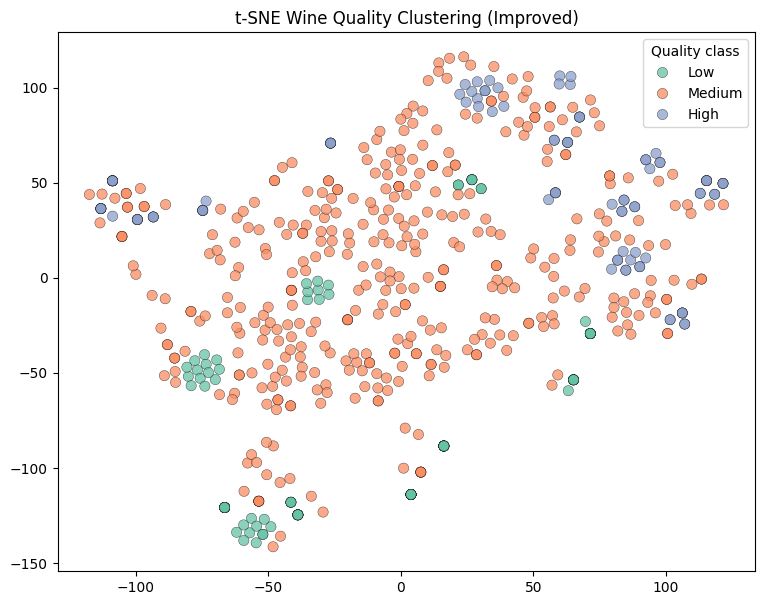

Running TSNE with perplexity=40


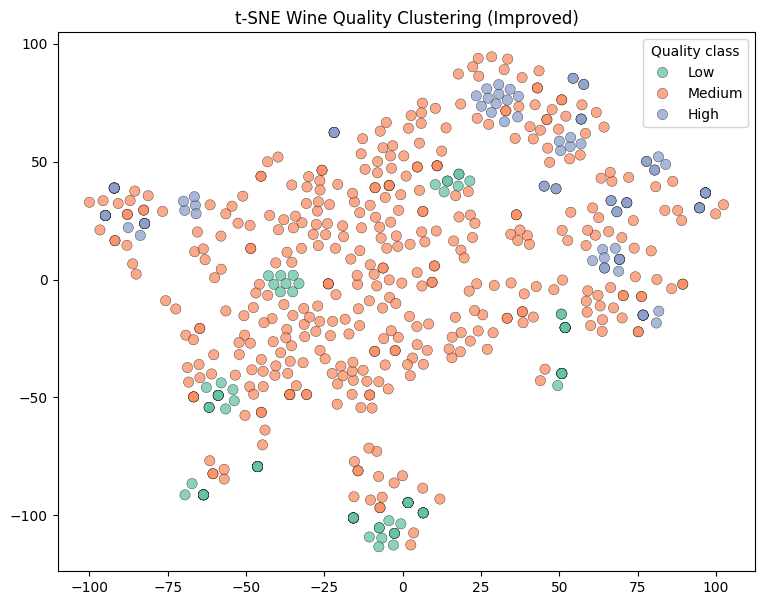

Running TSNE with perplexity=50


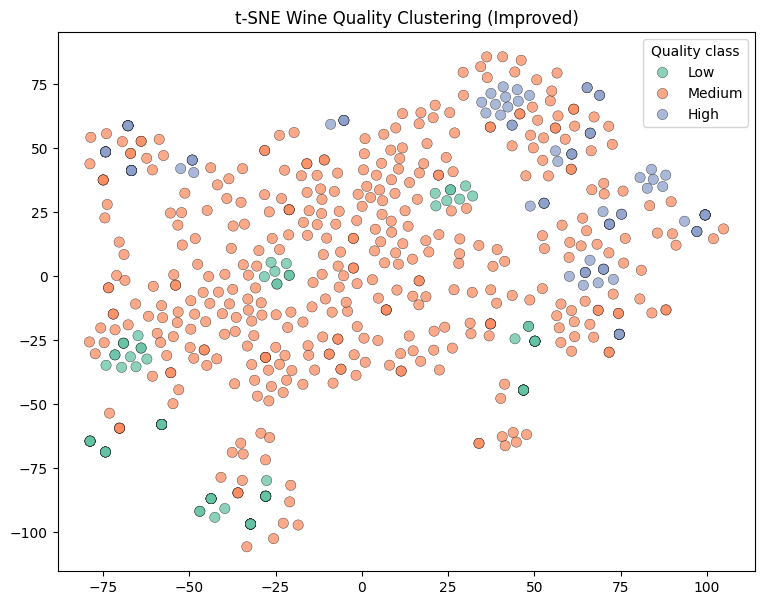

In [98]:
for p in [10, 20, 30, 40, 50]:
    print(f"Running TSNE with perplexity={p}")
    X_tsne = TSNE(perplexity=p, learning_rate='auto', init='pca', random_state=42).fit_transform(X_pca)


    plt.figure(figsize=(9,7))
    sns.scatterplot(
        x=X_tsne[:,0], y=X_tsne[:,1], 
        hue=y_cat, palette=["#66c2a5","#fc8d62","#8da0cb"], 
        s=55, alpha=0.75, edgecolor="black", linewidth=0.3
    )
    plt.title("t-SNE Wine Quality Clustering (Improved)")
    plt.legend(title="Quality class")
    plt.show()

<br><br>

## 7. Main code as possible solution to the problem [1,5 valor] 

<br><br>

## 8. Analysis of Example 1 [3,0 valor]

### Is it possible to identify distinct profiles of wines, based on physicochemical characteristics (acidity, alcohol, sugars, sulfates, SO₂, etc.), and are these profiles associated with different quality levels?

<br><br>

## 9. Analysis of Example 2 [3,0 valor]

<br><br>
## 10. Pros and cons of the approach [2,0 valor]

<br><br>
## 11. Future improvements [2,0 valor]

<br>
<div style="text-align: center;">
    <br><br>
    <p style="font-size: 40px;">References [1,0 valor]</p>
</div>
<br>
